In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

sns.set(style='whitegrid')

c:\Users\jimen\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Archivos

In [3]:
ruta_excel = r"C:\Users\jimen\Desktop\Marsh Mclennan\2023 Budget FX Rates.xlsx"
ruta_csv = r"C:\Users\jimen\Desktop\Marsh Mclennan\Años\consolidated_data_2024.csv"

DATOS

In [5]:
def cargar_datos(ruta_excel, ruta_csv):
    df_excel = pd.read_excel(ruta_excel, engine='openpyxl')
    df_csv = pd.read_csv(ruta_csv)    
    return df_excel, df_csv, df_dic_pais

df_excel, df_csv, df_dic_pais = cargar_datos(ruta_excel, ruta_csv)

Transformación de Datos

In [6]:
def preparar_datos(df_excel, df_csv):
    # Renombrar columna para hacer el merge
    df_excel.rename(columns={"CURR CODE": "Currency"}, inplace=True)
    
    # Hacer el merge usando la columna "Currency" como referencia
    df_merged = pd.merge(df_csv, df_excel[['Currency', 'BUDGET RATE']], on='Currency', how='left')
    
    # Convertir transacciones a USD
    df_merged['Transaction_USD'] = df_merged['Transaction'] * df_merged['BUDGET RATE']
    
    # Extraer el primer carácter de la columna "Client" y almacenarlo en "Seccion"
    df_merged['Seccion'] = df_merged['Client'].str[0]
      
    return df_merged

df_merged = preparar_datos(df_excel, df_csv)


In [7]:
df_merged.head()

,Client,Country,Currency,Transaction,date,BUDGET RATE,Transaction_USD,Seccion
0,FLVWa,FIJI,MWK,1626847.37,2024-01-04,0.000974,1585.232614,F
1,FLVWa,GUYANA,LAK,44546375.72,2024-01-04,0.000058,2603.290197,F
2,FLVWa,BAHAMAS,MMK,1758344.03,2024-01-04,0.000476,837.305844,F
3,EKKL3,BOTSWANA,TWD,34098.47,2024-01-04,0.032055,1093.039754,E
4,EKKL3,OMAN,CLP,54075.56,2024-01-04,0.001053,56.921557,E


Estadísticas Descriptivas y Visualizaciones

Estadísticas descriptivas por Sección:
           count          mean           std          min          25%  \
Seccion                                                                  
1           54.0   2473.985875   2022.188690   134.406098  1010.682166   
2           26.0  12761.232297  11931.993857   -56.699000  3065.393741   
3           18.0    580.153560    563.130182   -14.410807   196.256543   
A        54911.0   6945.638471  11539.898908 -1032.774073   928.101407   
B        46124.0   6685.056013  11453.620752 -1215.210815   858.395239   
C        38789.0   6754.531354  11472.499065  -684.393587   901.540933   
D        33805.0   6489.482853  10271.313976  -848.940000   834.816153   
E        27711.0   6755.483564  10383.131189 -1505.484184   944.303965   
F        23217.0   7096.352190  11681.090170  -948.927488   949.363800   
G        19986.0   6697.946476  10450.141022  -628.240333   824.750844   
H        16374.0   6928.939240  11812.198600  -492.998424   864.171035   

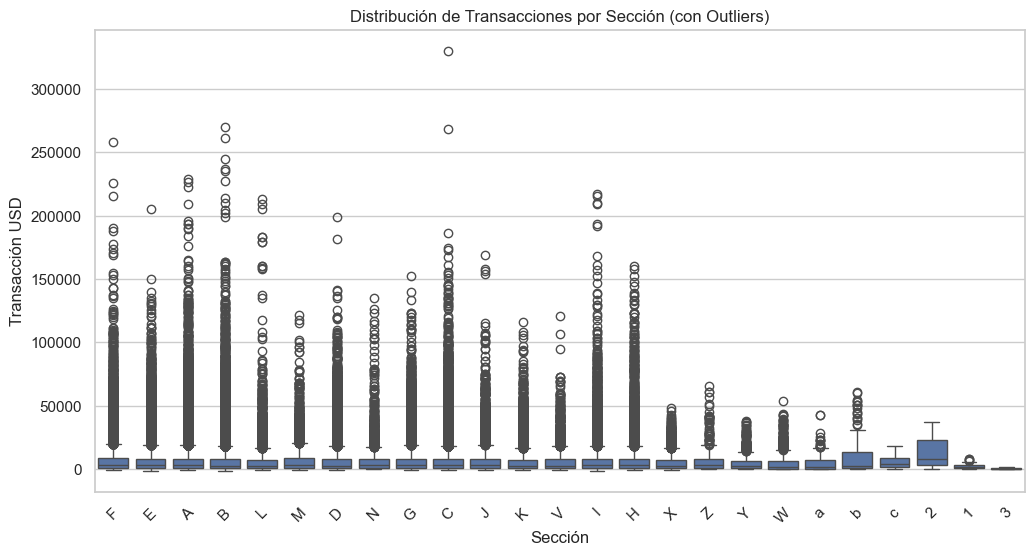

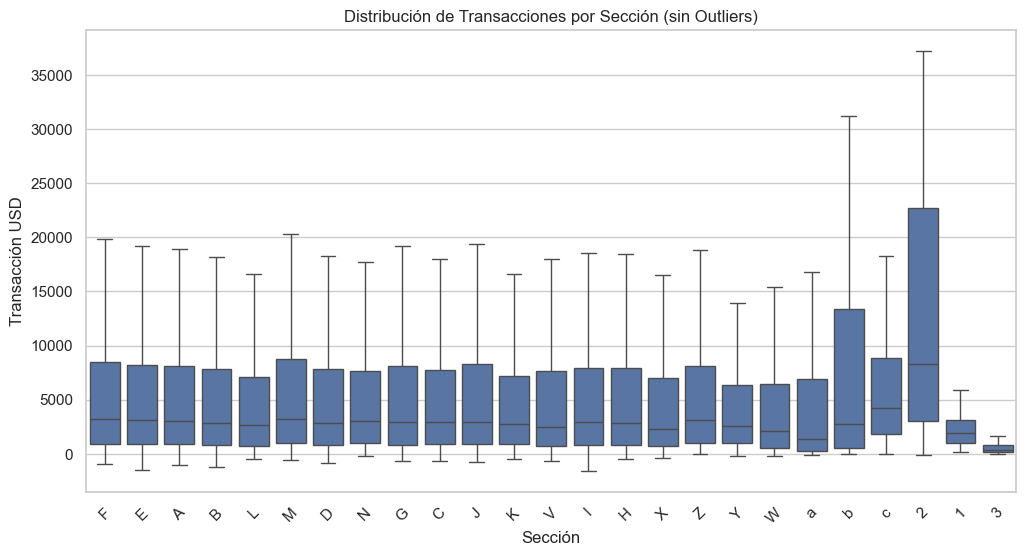

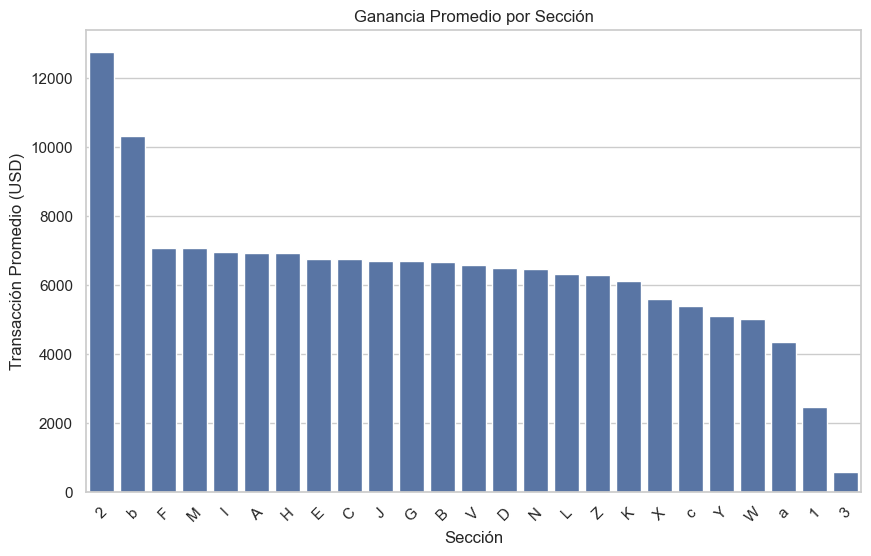

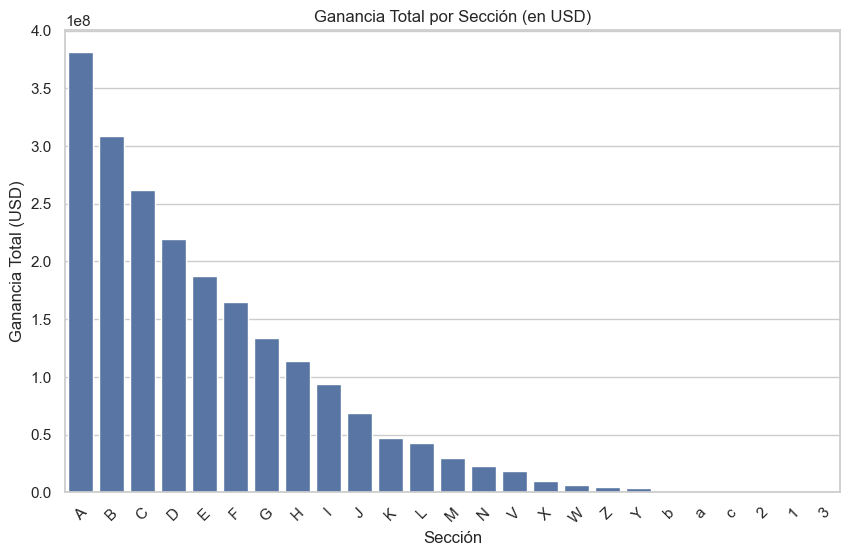

In [8]:
def estadisticas_descriptivas(df):
    # Estadísticas descriptivas por Sección
    seccion_stats = df.groupby('Seccion')['Transaction_USD'].describe()
    print("Estadísticas descriptivas por Sección:")
    print(seccion_stats)

    # Gráfico de boxplot (con y sin outliers)
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Seccion', y='Transaction_USD', data=df)
    plt.title('Distribución de Transacciones por Sección (con Outliers)')
    plt.xlabel('Sección')
    plt.ylabel('Transacción USD')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Seccion', y='Transaction_USD', data=df, showfliers=False)
    plt.title('Distribución de Transacciones por Sección (sin Outliers)')
    plt.xlabel('Sección')
    plt.ylabel('Transacción USD')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de barras para Ganancia Promedio y Ganancia Total por Sección
    avg_transaction_seccion = df.groupby('Seccion')['Transaction_USD'].mean().sort_values(ascending=False)
    total_transaction_seccion = df.groupby('Seccion')['Transaction_USD'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=avg_transaction_seccion.index, y=avg_transaction_seccion.values)
    plt.title('Ganancia Promedio por Sección')
    plt.xlabel('Sección')
    plt.ylabel('Transacción Promedio (USD)')
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=total_transaction_seccion.index, y=total_transaction_seccion.values)
    plt.title('Ganancia Total por Sección (en USD)')
    plt.xlabel('Sección')
    plt.ylabel('Ganancia Total (USD)')
    plt.xticks(rotation=45)
    plt.show()

estadisticas_descriptivas(df_merged)

ANOVA

In [9]:
def realizar_anova(df):
    # Ajustar el modelo usando Ordinary Least Squares (OLS)
    anova_model = ols('Transaction_USD ~ C(Seccion)', data=df).fit()

    # Realizar la prueba ANOVA
    anova_table = sm.stats.anova_lm(anova_model, typ=2)
    print("Resultados de la prueba ANOVA:")
    print(anova_table)

realizar_anova(df_merged)

Resultados de la prueba ANOVA:
                  sum_sq        df         F        PR(>F)
C(Seccion)  2.809372e+10      24.0  9.427538  8.216092e-35
Residual    3.907837e+13  314729.0       NaN           NaN


Regresión Lineal con Variables Dummy

In [10]:
def realizar_regresion(df):
    # Convertir 'Seccion' a variables dummy
    df_dummies = pd.get_dummies(df['Seccion'], drop_first=True)

    # Definir la variable dependiente (y) y las independientes (X)
    y = df['Transaction_USD']
    X = df_dummies

    # Concatenar X e y en un nuevo DataFrame para eliminar NaN
    df_for_regression = pd.concat([X, y], axis=1)
    df_for_regression = df_for_regression.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)
    df_for_regression = df_for_regression.dropna()

    # Actualizar X e y sin valores NaN
    X = df_for_regression[df_dummies.columns]
    y = df_for_regression['Transaction_USD']

    # Añadir un término constante a X para la regresión (esto es el intercepto)
    X = sm.add_constant(X)

    # Ajustar el modelo de regresión lineal
    try:
        regression_model = sm.OLS(y, X).fit()

        # Mostrar los resultados del modelo de regresión lineal
        print("Resultados de la regresión lineal:")
        print(regression_model.summary())

    except ValueError as e:
        print(f"Error en el ajuste del modelo: {e}")

realizar_regresion(df_merged)

Resultados de la regresión lineal:
                            OLS Regression Results                            
Dep. Variable:        Transaction_USD   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     9.428
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           8.22e-35
Time:                        12:09:28   Log-Likelihood:            -3.3797e+06
No. Observations:              314754   AIC:                         6.759e+06
Df Residuals:                  314729   BIC:                         6.760e+06
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2473.